**Лабораторная работа 9**

Изучение скорости сходимости однопараметрического метода

> Цель работы

Изучить зависимость скорости сходимости однопараметрического метода в зависимости от значения τ.

> Задание

1. Реализовать однопараметрический метод для положительной симметричной матрицы.
2. Используя готовые библиотеки вычислить спектр матрицы A и получить минимальное и
максимальное значение спектра λ min и λ max . После чего вычислить τ опт = 2/(λ min +λ max ).
3. Построить график зависимости количества итераций решения уравнения Ax=b
однопараметрическим методом в зависимости от значения τ лежащего в пределах от 0 до
2/ λ max. Определить τ опт из графика и сравнить с теоретическим значением полученным в
пункте 2.
4. Для каждого эксперимента пункта 3 вывести условие сходимости



Выходные данные были обрезаны до нескольких последних строк (5000).
0.016526177127768098
0.013473851135992955
0.01099897351866293
0.008987636312595724
0.007349957004953073
0.006014511321117969
0.004924207079688657
0.00403318416966386
0.0033044557716710972
0.002708092766655308
0.002219811792492712
0.001819867267160074
0.0014921751589625266
0.0012236154400662757
0.001003473697344652
0.0008229920730964478
0.0006750067533857403
0.0005536544107215704
0.00045413388132995326
0.0003725122859879337
0.00030556704412892515
0.00025065696383525394
0.0002056169433862671
0.00016867188536581735
0.00013836626919036944
0.00011350650203272749
9.31137087570024e-05
7.638505692573867e-05
6.266206489174143e-05
5.140462627324832e-05
4.216971590119421e-05
3.459393101064458e-05
2.8379175277498154e-05
2.3280918869792782e-05
1.909857028423495e-05
1.5667579640542383e-05
1.28529617606969e-05
1.054398356691524e-05
8.649806366814668e-06
7.095911310107472e-06
5.8211672095533025e-06
4.775425253823715e-06
3.917545909871

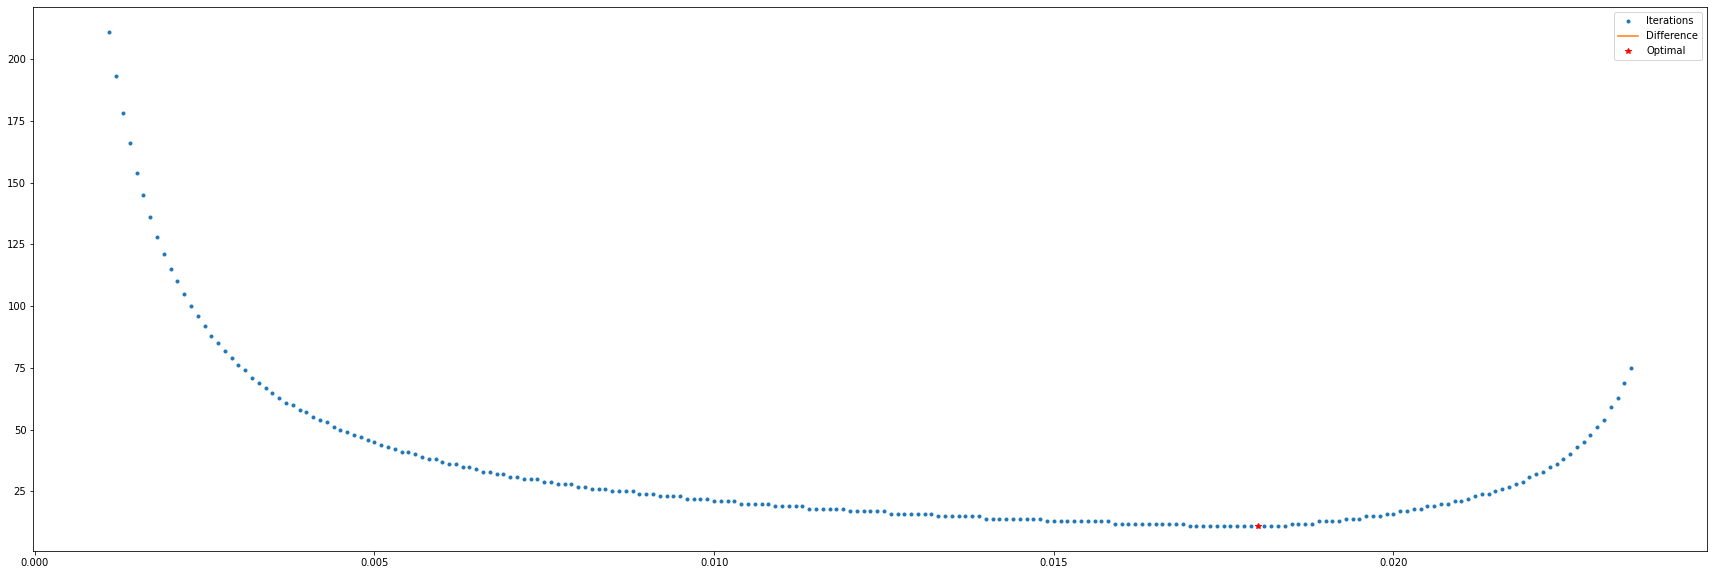

In [ ]:
import numpy
import random
import matplotlib.pyplot as plt


def get_random_float(a, b):
    return random.random() * (b - a) + a


def generate_matrix(n, a, b):
    m = numpy.random.random((n, n)) * (b - a) + a
    for i in range(0, n):
        for j in range(0, i):
            m[i][j] = m[j][i]
        m[i][i] = m[i][i] * 10
    return m


def get_tao(A):
    ch = numpy.linalg.eigh(A)[0]
    return 2 / (max(ch) + min(ch))


def generate_one(n):
    res = [[0] * n] * n
    for i in range(n):
        res[i][i] = 1

    return numpy.array(res)


def one_parameter_method(A, f, tao, n):
    g = tao * f
    E = numpy.identity(n)
    P = (E - tao * A)
    x_k = f
    r_k = [1.0] * n
    cnt = 1
    a = numpy.linalg.eigh(A)[0]

    while numpy.linalg.norm(r_k) > 0.001:
        mus = (1 - tao * a) ** 2
        r_k_norm_square = max(mus) * numpy.linalg.norm(r_k) ** 2
        print(r_k_norm_square)

        r_k = P * r_k
        x_k = (P * x_k + g)[0]
        cnt += 1

    return cnt


def generate_vector(n, a, b):
    res = []
    for i in range(n):
        res.append(get_random_float(a, b))
    return numpy.array(res)


def main():
    N = 5
    L, R = 0, 10

    A = generate_matrix(N, L, R)
    f = generate_vector(N, L, R)

    a = numpy.linalg.eigh(A)[0]
    ma, mi = max(a), min(a)
    tao = 0.001
    taos = []
    cnts = []

    while tao < 2 / ma:
        tao += 0.0001
        taos.append(tao)
        cnt = one_parameter_method(A, f, tao, N)
        cnts.append(cnt)

    plt.figure(figsize=(30, 10))
    plt.plot(taos, cnts, '.')
    plt.plot([2 / (ma + mi)] * 2, [min(cnts), one_parameter_method(A, f, 2 / (ma + mi), N)])
    plt.plot(2 / (ma + mi), one_parameter_method(A, f, 2 / (ma + mi), N), '*r')
    plt.legend(['Iterations', 'Difference', 'Optimal'])


if __name__ == "__main__":
    main()
